In [3]:
import pandas as pd
import gzip
import sys, os
import numpy as np
from emoji import UNICODE_EMOJI, demojize
from tqdm.notebook import tqdm
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')

%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
sys.path.insert(0, os.path.abspath('..'))

from src.data import make_dataset, preprocessor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11941\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11941\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Created Merged DataFrame

In [4]:
file_list = os.listdir('../data/raw/')
final_df = make_dataset.get_dataset('../data/raw/', file_list)

100%|██████████| 18/18 [01:52<00:00,  6.26s/it]


In [5]:
final_df.to_csv('../data/interim/data_cleaned_version_1.csv') # export to csv
df = final_df[final_df['language']=='en']
ru_df = final_df[final_df['language']=='ru']
del final_df

### Count Emojis

[Text(0.5, 1.0, 'Top 20 Most Used Emojis')]

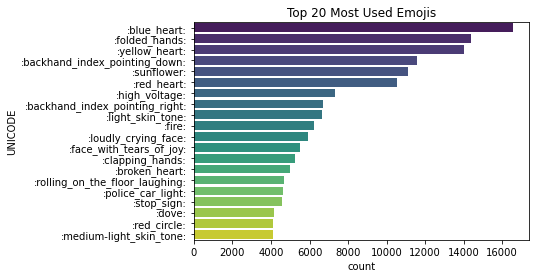

In [6]:
emojis_df = make_dataset.get_all_emoji(df, 'en')   
sns.barplot(y="UNICODE", x="count", data=emojis_df.head(20), palette='viridis').set(title='Top 20 Most Used Emojis')

In [7]:
emoji_text_dict = {":blue_heart:": "love to ukraine", 
                   ":folded_hands:": "prayers", 
                   ":yellow_heart:": "love to ukraine", 
                   ":sunflower:": "peace", 
                   ":red_heart:": "love", 
                   ":high_voltage:": "tension", 
                   ":fire:": "heated", 
                   ":loudly_crying_face:": "sad", 
                   ":face_with_tears_of_joy:": "joy", 
                   ":clapping_hands:": "excellent", 
                   ":broken_heart:": "heart break", 
                   ":rolling_on_the_floor_laughing:": "joy", 
                   ":stop_sign:": "stop", 
                   ":dove:": "peace", 
                   ":raised_fist:": "support", 
                   ":flexed_biceps:": "strong", 
                   ":red_exclamation_mark:": "urgent", 
                   "double_exclamation_mark": "urgent",
                   ":thinking_face:": "pondering",
                   ":thumbs_up:": "excellent",
                   ":collision:": "conflict",
                   ":pouting_face:": "anger",
                   ":warning:": "warning", 
                   "face_with_symbols_on_mouth": "warning" 
                  }

#df['text'] = df['text'].map(lambda x: preprocessor.process_emoji(x, emoji_text_dict))

### Format and Count Hashtags

In [8]:
preprocessor.clean_hashtag(df)

,userid,username,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,313480107,chavez145,939,577,69258,2011-06-08 18:31:50,2022-02-28 00:07:06,642,⚡️New York State Governor Kathy Hokul (Democra...,[russia],en,0
1,2170195636,d7xen,1631,214,1630,2013-11-06 01:34:15,2022-02-28 00:07:07,6,Closer look at the Vasylkiv oil depot fire whi...,"[osint, russia]",en,0
2,2324486774,GayEqualGlobal,34037,34867,267610,2014-02-02 23:23:52,2022-02-28 00:07:07,1501,#Russia's state media is flipping out over our...,[russia],en,0
3,2544474997,Jmltrouille,1586,1429,28390,2014-06-03 22:19:12,2022-02-28 00:07:08,3,Ukrainian National Anthem with English transla...,"[ukraine, eukraine]",en,0
4,991781656808886272,Akan__Drama,1095,1036,22392,2018-05-02 20:49:08,2022-02-28 00:07:08,128,JUST IN: Ukraine opens global recruitment prog...,[],en,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835197,536744675,SCVIndy,4083,1714,84124,2012-03-25 23:42:57,2022-03-26 23:59:49.000000,0,@RonnyJacksonTX Listen to #trump praise #putin...,"[trump, putin, ukraine, ukraine, fam46, ukrain...",en,0
835198,46825562,dawn_westlake,397,636,49224,2009-06-13 04:27:30,2022-03-26 23:59:52.000000,0,"@djrothkopf Also, what the heck is wrong with ...","[savedemocracy, standwithukraine, putinmustgo]",en,0
835199,1443389368463511552,Snezhana_Slav,353,275,2521,2021-09-30 01:37:05,2022-03-26 23:59:52.000000,0,"March 26, 2022 \n#RussianArmy has gained Khers...","[russianarmy, ukraine]",en,0
835200,1297137944906670081,MykolaGuitar,325,222,225,2020-08-22 11:46:18,2022-03-26 23:59:52.000000,4,🐕🐕🐕 russian missile hit civilian houses right ...,[],en,0


[Text(0.5, 1.0, 'Top 20 Most Used Hashtags')]

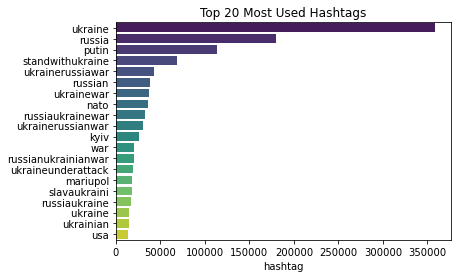

In [9]:
counts = make_dataset.count_hashtags(df)
sns.barplot(y=counts.head(20).index, x="hashtag", data=counts.head(20), palette='viridis').set(title='Top 20 Most Used Hashtags')

### Russian Tweets Translation

In [ ]:
df_splits = np.array_split(ru_df, 6) # run in smaller splits

my_dict = {}
for i, _df in enumerate(df_splits):
    print('translating df number '+str(i+1))
    my_dict['lst_%s' % str(i+1)] = make_dataset.run_translate(_df)
    
translated_list = [item for sublist in list(my_dict.values()) for item in sublist]
ru_df['text_translated'] = translated_list
final_df = ru_df[ru_df['text_translated']!='TypeError'].copy()
final_df.drop(['Unnamed: 0'], axis=1, inplace=True)
final_df.reset_index(inplace=True, drop=True)
final_df.to_csv('../data/interim/russian_tweets_translated.csv')

### Process Pre-War Data

In [11]:
final_df = pd.DataFrame()
file_list = os.listdir('../data/external/')
with tqdm(total=len(file_list)) as pbar:
    for file in file_list:
        df = pd.read_csv('../data/external/'+ file)
        df = make_dataset.process_new_data(df)
        df['usercreatedts'] = pd.to_datetime(df['usercreatedts']) # convert to datetime
        df = df[df['usercreatedts'].dt.year != 2022] # filter out accounts created recently in 2022
        df = df.drop_duplicates(subset=['text'], keep='first') # drop duplicated retweets, keep first occurrence
        df = df[(df['language'] == 'en') | (df['language'] == 'ru')] # filter out None English and Russian language tweets 
        df = df[(df['followers'] >= 200) & (df['totaltweets'] >= 200)] # only keep accounts that have over 200 followers/totaltweets
        final_df = pd.concat([final_df, df],ignore_index=True) # use concat because it's faster than append
        pbar.update(1)

  0%|          | 0/8 [00:00<?, ?it/s]

In [12]:
final_df['tweetcreatedts'] = pd.to_datetime(final_df['tweetcreatedts'])
dates = ['01-17-2022', '01-18-2022', '01-24-2022', '01-25-2022', '02-21-2022', '02-22-2022', '02-24-2022', '02-25-2022']
concat_df = pd.DataFrame()
for date in dates:
    temp_df = final_df[(final_df['tweetcreatedts'].dt.day == int(date.split('-')[1])) & 
                       (final_df['tweetcreatedts'].dt.month == int(date.split('-')[0])) & 
                       (final_df['tweetcreatedts'].dt.year == int(date.split('-')[2]))]
                       
    concat_df = pd.concat([concat_df, temp_df],ignore_index=True)
 
concat_df.sort_values(by=['tweetcreatedts'], inplace=True) # sort by tweetcreatedts
concat_df = concat_df.drop_duplicates(subset=['text'], keep='first') # drop retweets across daily borders
concat_df.reset_index(drop=True, inplace=True) # reset index
concat_df
concat_df.to_csv('../data/interim/new_data.csv',index=False)